<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
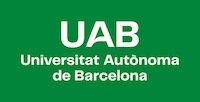
</div>
</div>
<div style="float: right; width: 50%;">
    <p style="margin: 0; padding-top: 22px; text-align:right;"><b>104346 - Processament de Senyal, Imatge i Vídeo</b></p>
    <p style="margin: 0; text-align:right;">Grau en Enginyeria de Dades</p>
    <p style="margin: 0; text-align:right;">Universitat Autònoma de Barcelona (UAB)</p>
</div>
<div style="width: 100%; clear: both;"></div>
<div style="width:100%;">&nbsp;</div>

<div class="alert alert-block alert-info">
    Nom, cognoms i NIU: Lucia Garrido (1671463), Albert Guillaumet (1672344), David Morillo (1666540), Adrià Muro (1665191)
</div>

# **S4-1 Laboratori**: _Noise models_

La qualitat de les imatges digitals és un aspecte crític en una àmplia gamma d'aplicacions, des de la fotografia fins a la visió per ordinador i el processament d'imatges mèdiques. Tot i això, aquestes imatges estan subjectes a diversos tipus de degradacions, sent una de les més comunes la introducció de soroll. El soroll a les imatges digitals pot sorgir de múltiples fonts, com ara l'electrònica dels dispositius de captura, la transmissió de dades o el processament d'imatges.

És important destacar que la presència de soroll a les imatges digitals pot comprometre seriosament la seva utilitat i confiabilitat en diverses aplicacions. Per tant, el desenvolupament de tècniques efectives per mitigar l'impacte del soroll és molt important. Aquestes tècniques inclouen mètodes de filtratge que busquen eliminar o reduir la presència del soroll sense sacrificar la informació rellevant a la imatge.

En resum, l'estudi del fenomen de soroll en imatges digitals és essencial per comprendre les limitacions i els desafiaments associats amb la manipulació i el processament d'imatges en entorns digitals. Aquesta comprensió és crucial per al desenvolupament destratègies efectives de preprocessament i restauració dimatges, amb lobjectiu de millorar la qualitat i la utilitat de les imatges en una varietat daplicacions pràctiques.

## OpenCV

En aquesta activitat utilitzarem, per a la manipulació de la imatges, la llibreria [OpenCV](https://pypi.org/project/opencv-python/). OpenCV (Open Source Computer Vision Library) és una biblioteca de codi obert àmpliament utilitzada al camp de la visió per ordinador i el processament d'imatges.

Proporciona una àmplia gamma d'eines i funcions que permeten als desenvolupadors treballar amb imatges i vídeos de manera eficient. OpenCV ofereix suport per a diverses operacions de processament d'imatges, com ara detecció d'objectes, seguiment de moviment, reconeixement facial, calibratge de càmeres, segmentació d'imatges, entre moltes altres.

Per instal·lar aquesta llibreria, podem executar:

> pip install opencv-python

Per més informació, consultar:
- https://pypi.org/project/opencv-python/

In [1]:
# Llibreries necessaries per aquest exercici
import cv2
import numpy as np

from matplotlib import pyplot as plt

## Exercici 1 (_2 punts_)

Implementa els següents apartats:
1. Selecciona 3 imatges (preferiblement en escala de grisos, _greyscale_) que siguin notablement diferents entre elles (tamany de la imatge, complexitat de la imatge, etc.)
2. Carrega les imatges que han seleccionat anteriorment, i transforma-les a imatges en escala de grisos amb 256 nivells de color. És a dir, representa les imatges fent servir un _array_ de `Numpy` de dues dimensions de tipus `uint8`.
3. Crea una funció per visualitzar les imatges correctament.
4. Crea una funció per calcular i visualitzar els histogrames de les imatges anteriors.

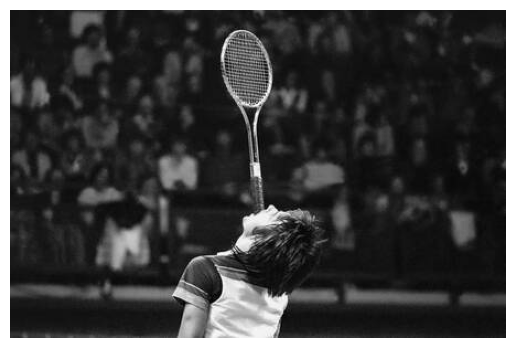

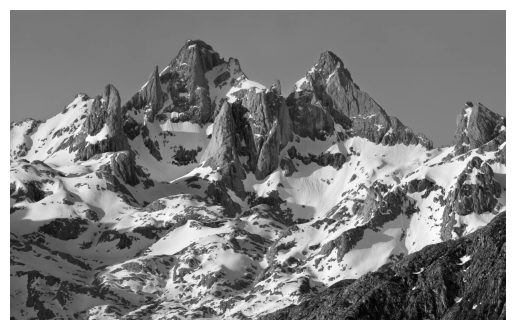

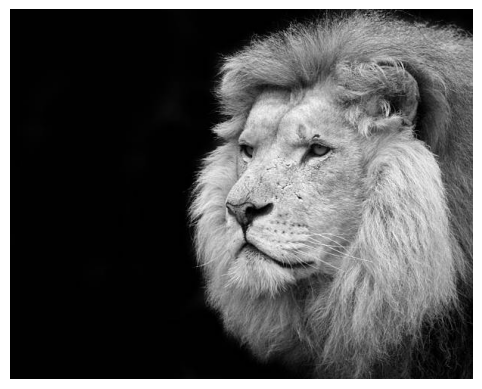

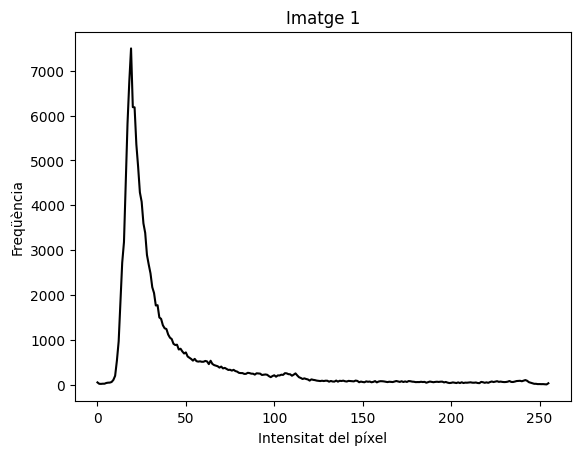

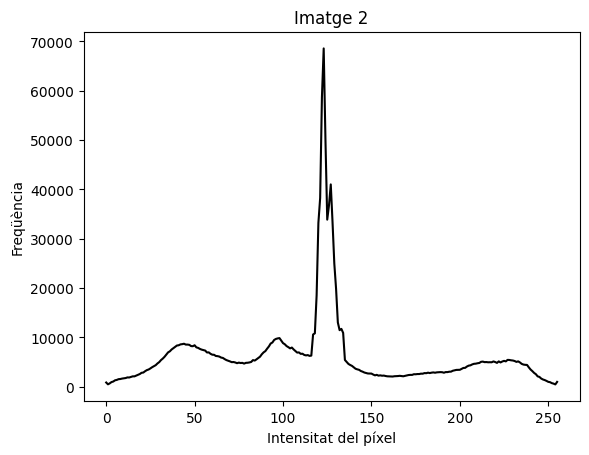

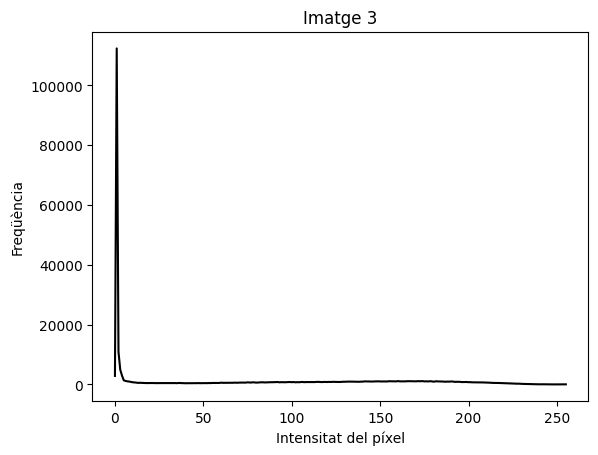

In [2]:
#carreguem les tres imatges:
img1 = cv2.imread('TENIS.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('MONTAÑA.jpg',cv2.IMREAD_GRAYSCALE)
img3 = cv2.imread('LEON.jpg',cv2.IMREAD_GRAYSCALE)
img1_uint8 = np.uint8(img1)
img2_uint8 = np.uint8(img2)
img3_uint8 = np.uint8(img3)

#funció per visualitzar les imatges:
def visualitzar_imatges(imatge):
    plt.imshow(imatge, cmap = 'gray') #fem cmap = 'gray' perquè les imatges surtin en blanc i negre
    plt.axis('off')
    plt.show()
visualitzar_imatges(img1_uint8)
visualitzar_imatges(img2_uint8)
visualitzar_imatges(img3_uint8)

#funció per calcular i visualitzar l'histograma
def histograma (imatge,titol):
    histograma = cv2.calcHist([imatge], [0], None, [256], [0, 256])
    plt.plot(histograma, color='black')
    plt.xlabel('Intensitat del píxel')
    plt.ylabel('Freqüència')
    plt.title(titol)
    plt.show()

histograma(img1_uint8,'Imatge 1')
histograma(img2_uint8,'Imatge 2')
histograma(img3_uint8,'Imatge 3')

## Exercici 2 (_6 punts_)

En aquesta part, **implementarem 4 models de soroll** per perturbar les imatges i estudiar els resultats.

En concret, implementarem (**obligatòriament**):
- Guassian noise
- Salt-and-Pepper Noise

I escollirem **2 models (com a mínim)** dels següents:
- Rayleigh Noise
- Erlang (Gamma) Noise
- Exponential Noise
- Uniform Noise

### A) Gaussian noise (_2 punts_)

Resol les següents tasques relacionades amb aquest model de soroll:
1. Implementa una funció per aplicar aquest model de soroll a una imatge en escala de grisos representada com un _array_ bidimensional de `Numpy`. La funció ha de rebre com a paràmetres la imatge i els paràmetres del model, i ha de retornar la imatge amb soroll (_noisy image_).
2. Aplica la funció que has implementat a les 3 imatges anteriors, seleccionant diferents valors de paràmetres (fent una cerca tipus _grid search_).
3. Calcula l'histograma de totes les imatges perturbades, i compara els histogrames de les imatges originals i les perturbades.

In [3]:
"""
def grid_search(imatge,parametres1, parametres2, funcio):
    millors_parametres = []
    mida_resultats = (len(parametres1), len(parametres2))
    resultats = np.zeros(mida_resultats, dtype = np.uint8)
    for p1 in range(len(parametres1)):
        for p2 in range(len(parametres2)):
          par1 = parametres1[p1]
          par2 = parametres2[p2]
          resultats[p1,p2] = funcio(par1,par2)
    max = np.argmax(resultats)
    return max
"""

'\ndef grid_search(imatge,parametres1, parametres2, funcio): \n    millors_parametres = []\n    mida_resultats = (len(parametres1), len(parametres2))\n    resultats = np.zeros(mida_resultats, dtype = np.uint8)\n    for p1 in range(len(parametres1)): \n        for p2 in range(len(parametres2)): \n          par1 = parametres1[p1]\n          par2 = parametres2[p2]\n          resultats[p1,p2] = funcio(par1,par2)\n    max = np.argmax(resultats)\n    return max\n'

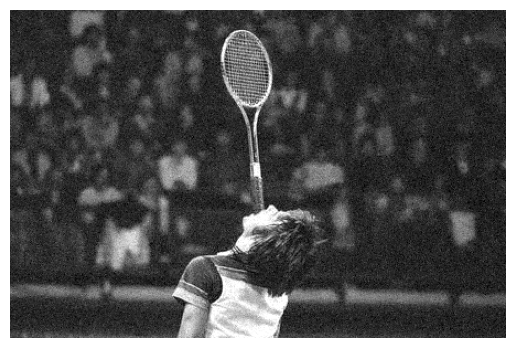

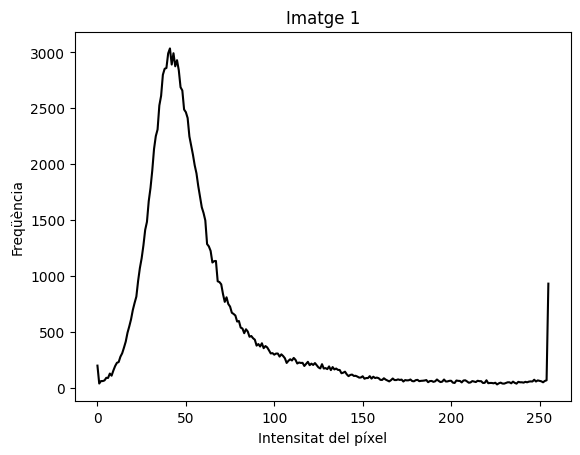

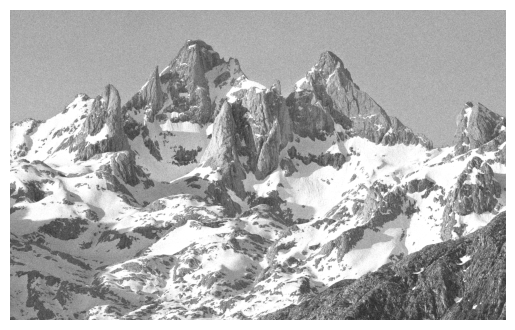

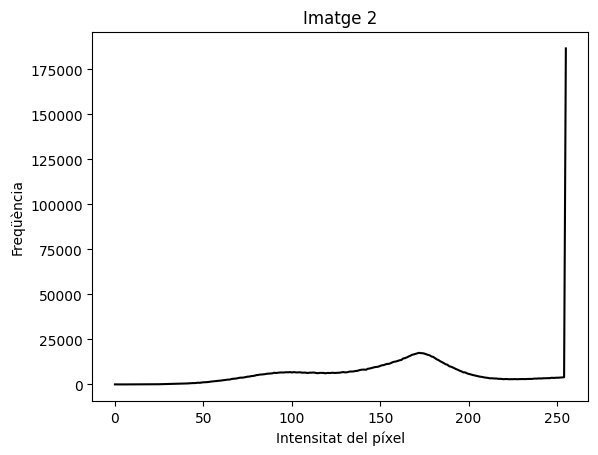

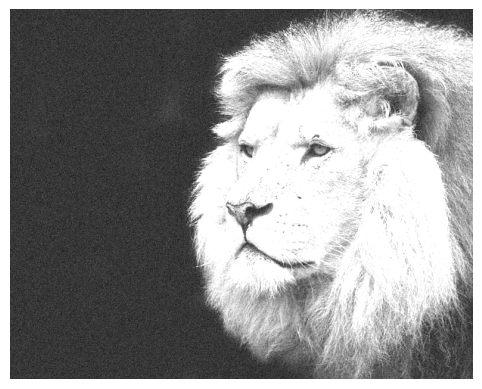

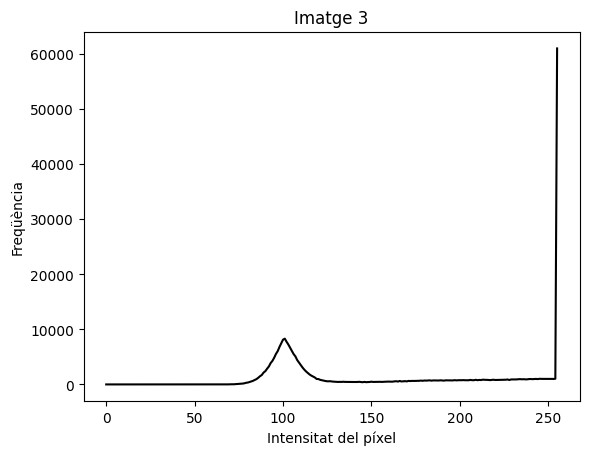

In [4]:
import random
def gausian_noise(imatges,mitjanes,desviacions):
    res = []
    for a in range(len(imatges)):
        #creem el soroll per a cada imatge
        #soroll = np.random.normal(mitjanes[a],desviacions[a],imatges[a].shape)
        #1.obtenir les dimensions de la imatge:
        files, columnes = imatges[a].shape
        imatge = np.copy(imatges[a]) #copiem per no modificar la imatge original
        matriu_soroll = np.zeros((files,columnes),dtype=np.uint8)#matriu buida pel soroll
        #2.generem soroll per cada píxel
        for i in range(files):
          for j in range(columnes):
            #generem la distribució normal:
            x1=random.random()
            x2=random.random()
            z=desviacions[a]*(x1*2-1) *((-2*np.log(x2))**0.5)
            pixel_soroll = imatge[i,j]+mitjanes[a]+z
            #ens hem d'assegurar que el valor del pixel estigui entre 0 i 255
            pixel_soroll = np.clip(pixel_soroll,0,255)
            matriu_soroll[i,j] = pixel_soroll
        res.append(matriu_soroll)
    return res


#parametres, cerca grid search:
#grid search seria totes les possibles combinacions i agafar la 'millor',
#pero quin criteri seguim per saber quina es la millor si nomes volem afegir
#soroll a la imatge?
mitjanes = [20, 50, 100]
desviacions = [15, 20, 10]
imatges = [img1_uint8, img2_uint8,img3_uint8]
res = gausian_noise(imatges, mitjanes, desviacions)
#aprofitem la funció de l'apartat anterior per calcular els histogrames
for i,imatge in enumerate(res):
    visualitzar_imatges(imatge)
    histograma(imatge,'Imatge '+str(i+1))


B) Salt-and-peper noise (_2 punts_)

Resol les següents tasques relacionades amb aquest model de soroll:
1. Implementa una funció per aplicar aquest model de soroll a una imatge en escala de grisos representada com un _array_ bidimensional de `Numpy`. La funció ha de rebre com a paràmetres la imatge i els paràmetres del model, i ha de retornar la imatge amb soroll (_noisy image_).
2. Aplica la funció que has implementat a les 3 imatges anteriors, seleccionant diferents valors de paràmetres (fent una cerca tipus _grid search_).
3. Calcula l'histograma de totes les imatges perturbades, i compara els histogrames de les imatges originals i les perturbades.

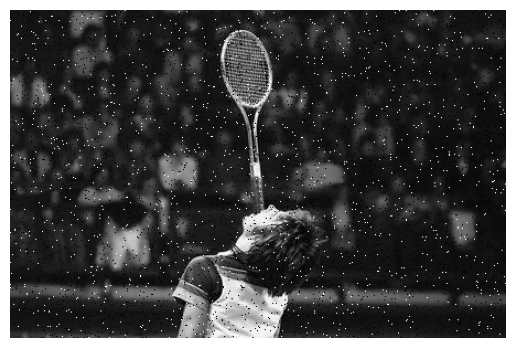

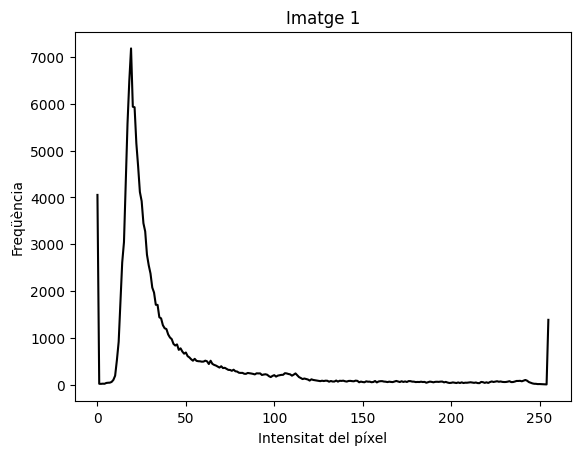

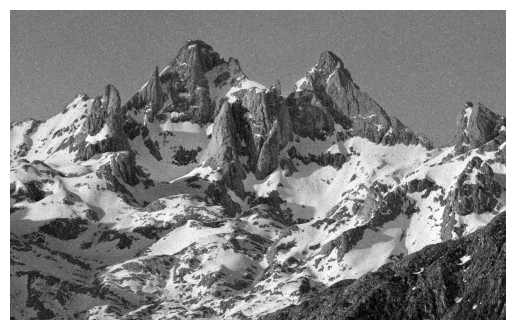

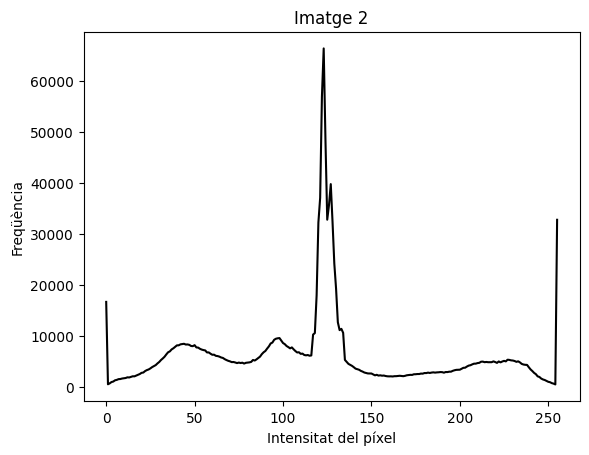

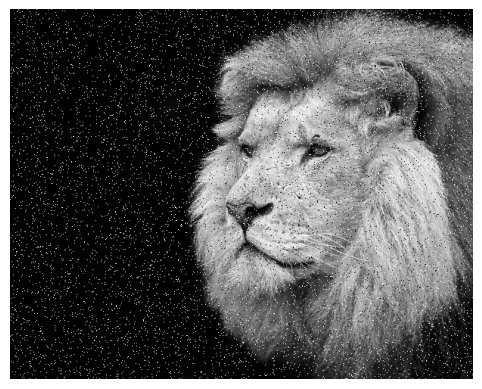

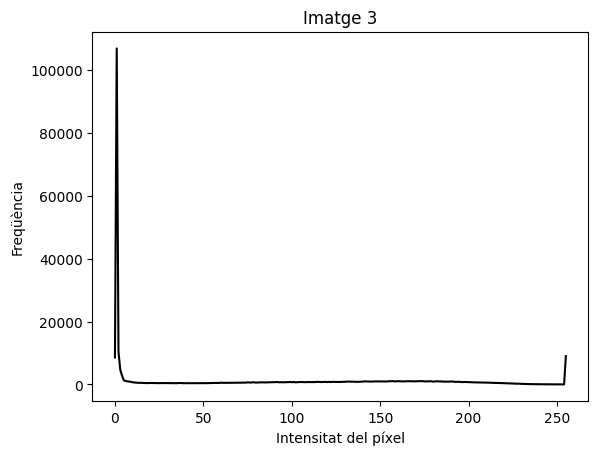

In [5]:
#aparició aleatòria de píxels blancs (sal) i negres (pebre)
def salt_peper(imatges,psal,ppebre): #probabilitats de sal i pebre
    res = []
    for i in range(len(imatges)): #aprofitem la llista d'imatges de l'apartat anterior
        imatge_sp = np.copy(imatges[i])
        #generem el soroll de sal (blanc)
        sal = np.random.rand(*imatge_sp.shape)<psal[i]
        imatge_sp[sal] = 255
        #generem el soroll de pebre (negre)
        pebre= np.random.rand(*imatge_sp.shape)<ppebre[i]
        imatge_sp[pebre] = 0
        res.append(imatge_sp)
    return res

psal = [0.01,0.02,0.03]
ppebre = [0.03,0.01,0.02]
salt_peper = salt_peper(imatges, psal, ppebre)
#aprofitem la funció de l'histograma
for i, img in enumerate(salt_peper):
    visualitzar_imatges(img)
    histograma(img,'Imatge '+str(i+1))


### C) Model opcional 1 (_1 punt_)

Indica quin és el primer model que has escollit.

Resol les següents tasques relacionades amb aquest model de soroll:
1. Implementa una funció per aplicar aquest model de soroll a una imatge en escala de grisos representada com un _array_ bidimensional de `Numpy`. La funció ha de rebre com a paràmetres la imatge i els paràmetres del model, i ha de retornar la imatge amb soroll (_noisy image_).
2. Aplica la funció que has implementat a les 3 imatges anteriors, seleccionant diferents valors de paràmetres (fent una cerca tipus _grid search_).
3. Calcula l'histograma de totes les imatges perturbades, i compara els histogrames de les imatges originals i les perturbades.

Rayleigh Noise


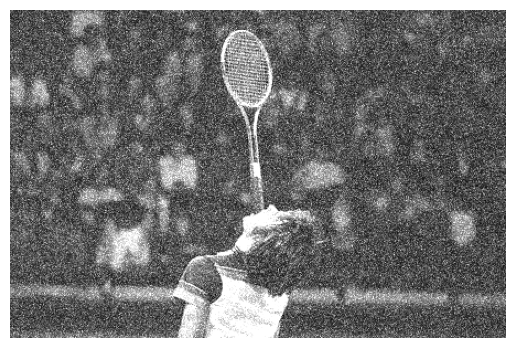

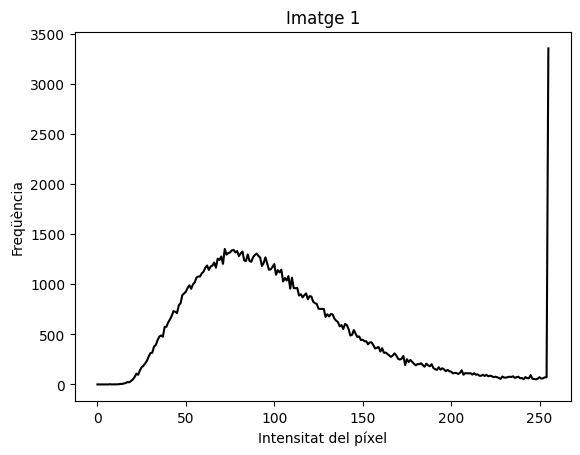

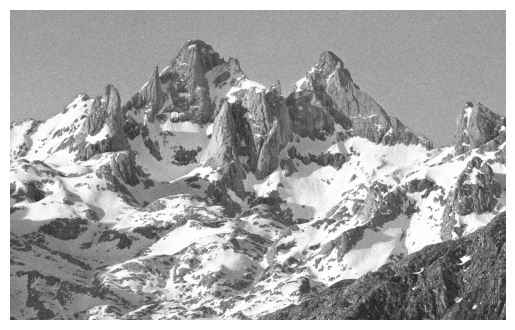

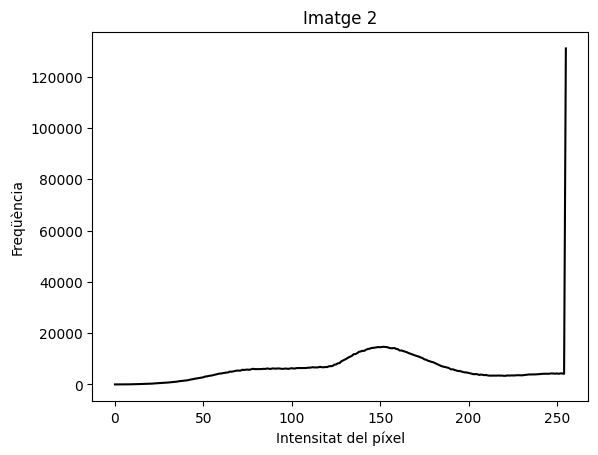

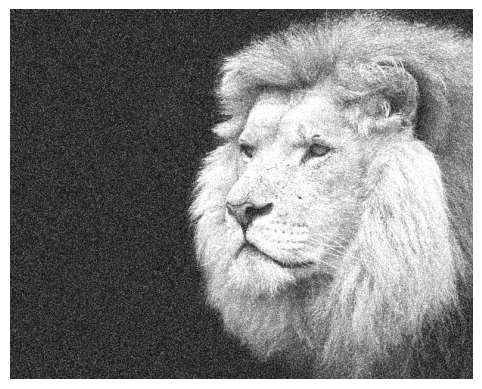

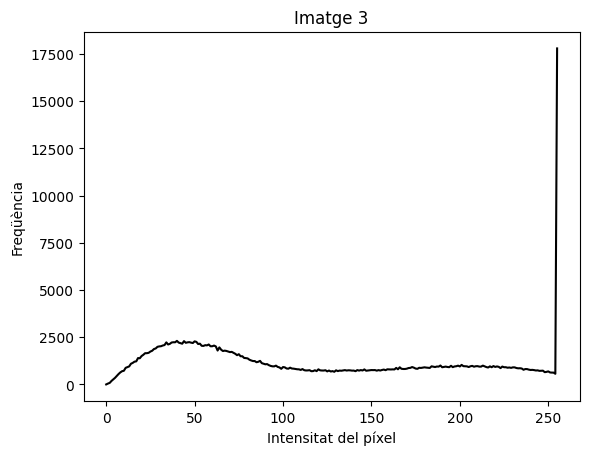

In [6]:
print('Rayleigh Noise')
def RayleighNoise(imatges, escala):
    res = []
    for i in range(len(imatges)):
        img = np.copy(imatges[i])
        files,columnes = img.shape
        soroll_uniforme = np.random.rand(files,columnes)
        soroll = escala[i] * (-2*np.log(1-soroll_uniforme))**0.5
        img = img+soroll
        img = np.clip(img,0,255)
        img = np.uint8(img)
        res.append(img)
    return res

escala = [50,30,40] #llista de valors pel soroll
res = RayleighNoise(imatges,escala)
for i, img in enumerate(res):
    visualitzar_imatges(img)
    histograma(img,'Imatge '+str(i+1))


### D) Model opcional 2 (_1 punt_)

Indica quin és el segon model que has escollit.

Resol les següents tasques relacionades amb aquest model de soroll:
1. Implementa una funció per aplicar aquest model de soroll a una imatge en escala de grisos representada com un _array_ bidimensional de `Numpy`. La funció ha de rebre com a paràmetres la imatge i els paràmetres del model, i ha de retornar la imatge amb soroll (_noisy image_).
2. Aplica la funció que has implementat a les 3 imatges anteriors, seleccionant diferents valors de paràmetres (fent una cerca tipus _grid search_).
3. Calcula l'histograma de totes les imatges perturbades, i compara els histogrames de les imatges originals i les perturbades.

Erlang (Gamma) Noise


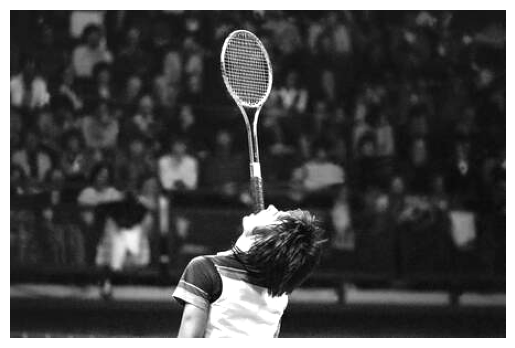

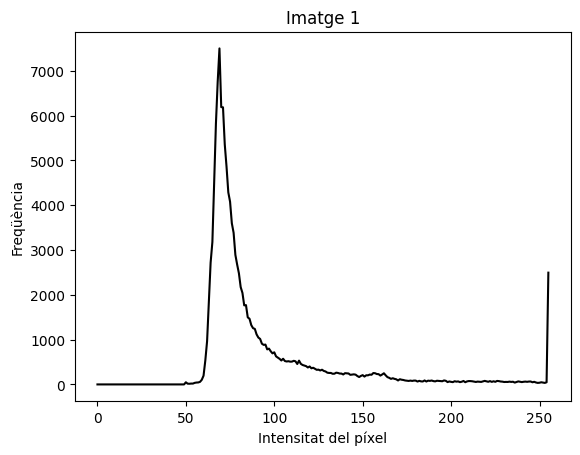

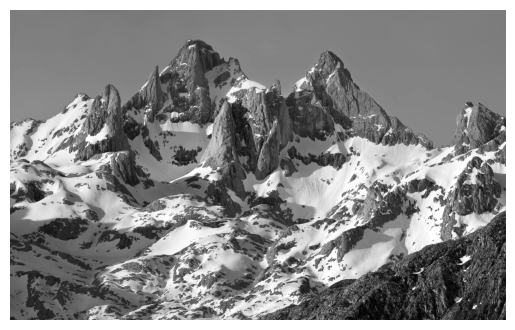

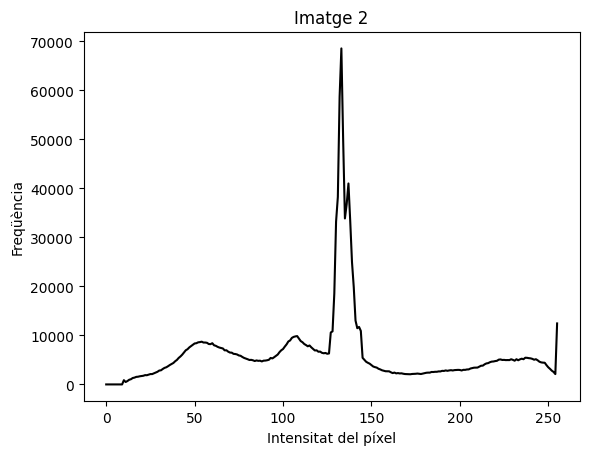

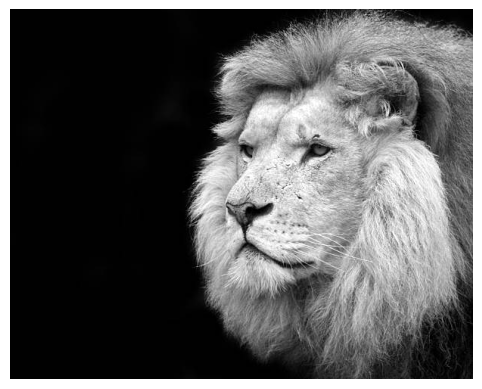

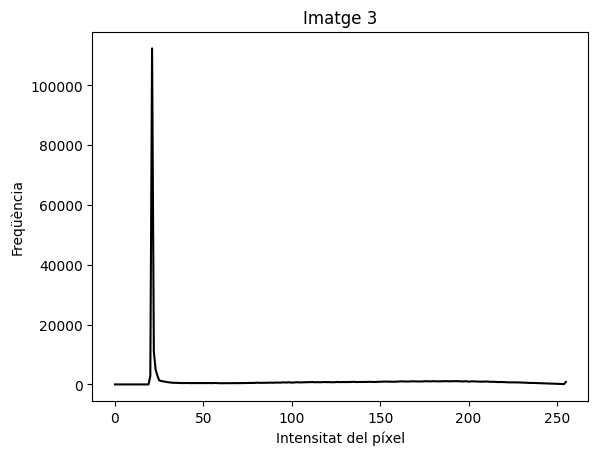

In [7]:
print('Erlang (Gamma) Noise')
def ErlangNoise(imatges, formes, escales):
    res = []
    for i in range(len(imatges)):
        img = np.copy(imatges[i])
        files,columnes = img.shape
        soroll_uniforme = np.random.rand(files,columnes)
        soroll = (-1/escala[i]) *np.log(1-soroll_uniforme)
        img = img+soroll+formes[i]
        img = np.clip(img,0,255)
        img = np.uint8(img)
        res.append(img)
    return res

escales = [30,4,50]
formes = [50,10,20]
res = ErlangNoise(imatges,formes,escales)
for i, img in enumerate(res):
    visualitzar_imatges(img)
    histograma(img,'Imatge '+str(i+1))

## Exercici 3 (_2 punts_)

Finalment, respon a les següents preguntes **justificant la teva resposta** i **relacionant-la amb els resultats** que has obtingut en aquesta activitat:
1. Per a cada model, indica quins paràmetres (o rangs de paràmetres) consideres que generen una imatge perturbada més "real".
2. Explica com és el tipus de soroll que genara cadascun dels models. És possible identificar el model de soroll a partir (només) de la imatge perturbada?
3. En el cas de treballar amb imatges en color (RGB), com hauries de modificar les teves funciones per poder aplicar correctament els models de soroll?

1.Gaussian Noise: En aquest cas, si volem simular una imatge realista hem d'emprar valors de  mitjana i de desviacions baixos. En un cas idoni s'hauria d'ajustar el valor de la mitjana (que modifica la llum de la imatge) a un nivell similar al de la imatge. D'igual manera amb la desviació estàndard, que afecta a la itensitat del soroll, és a dir, els valors més baixos distorsionaràn menys la imatge. Aquests resultats es poden veure en els histogrames d'aquest model (el primer és el que menys varia i el de valors més baixos als paràmetres).


2.Salt-pepper noise: Les probabilitats de sal i pebre controlen l'aparició de píxels blancs i negres. D'igual manera que en el cas anterior, com més baix és aquest valor menys soroll es genera  i més real és la imatge. D'altra banda, també s'ha de tenir en compte que la diferencia entre una probabilitat i l'altra no sigui molt gran; si una és significativament més gran que l'altra, el soroll serà més prominent en sal o pebre i la imatge queda desequilibrada. Per aquest motiu, amb les imatges i els paràmetres emprats, la imatge més realista i menys variant és la segona.


3.Rayleigh noise: La escala controla la dispersió de la distribució de Rayleigh. Com més alt sigui el valor de la escala més pronunciat serà el soroll. És per això que la imatge més realista en aquest cas torna a ser la segona.


4.Erlang noise: la forma determina la corba de la distribució. Els valors més alts esbaixen la corba cap a la dreta, i els més baixos cap a l'esquerra (més uniforme). D'altra banda, la escala determina l'amplada de la distribució. Els valors alts produeixen un soroll més pronunciat que els valors baixos. En aquest cas, tal i com podem veure als histogrames, la més realista és la tercera imatge.



En relació a la segona pregunta, és possible identificar el tipus de soroll d'alguns dels casos només mirant la fotografia. El salt-pepper noise és el més notable, ja que es poden distingir els píxels negres i blancs generats. També podem distingir prou bé el Rayleigh Noise, ja que genera un efecte de gra o textura molt notable. D'altra banda, l'Erlang Noise és més complicat d'identificar si no es coneixen els valors dels parametres. Tanmateix, el Gaussian Noise, si no és molt pronunciat, es pot confondre amb soroll natural de la imatge.


Per últim, responent la tercera pregunta, si la imatge fos en color i no en blanc i negre hauriem d'aplicar les modificacions de manera separada, de manera independent per a cada canal(vermell, blau i verd). Després s'haurien de combinar els resultats en una imatge conjunta.